In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('../data/result.csv')

In [8]:
data

,recno,IRAS,RA1950,DE1950,Fnu_12,q_Fnu_12,Fnu_25,q_Fnu_25,Fnu_60,q_Fnu_60,Fnu_100,q_Fnu_100,NLRS,NID,e_Fnu_100,e_Fnu_12,e_Fnu_25,e_Fnu_60
0,10878,02174+6052,34.358333,60.871389,0.8799,3,2.3630,3,32.010,1,127.90,1,0,0,0,6,6,0
1,10712,02156+6045,33.915417,60.766111,0.2729,1,0.3631,3,3.601,2,44.14,1,0,0,0,0,13,18
2,10714,02157+6053,33.928333,60.891111,0.8217,3,1.3090,3,21.800,2,215.10,1,0,0,0,16,13,16
3,10820,02168+6052,34.211250,60.870000,2.1570,3,2.1790,3,32.010,1,127.90,3,0,0,14,24,22,0
4,10851,02171+6058,34.286250,60.971667,0.3587,2,1.8400,3,11.610,2,63.52,3,0,0,17,15,6,10
5,10751,02160+6057,34.021250,60.960556,2.4030,3,2.9900,3,47.370,3,215.10,3,0,0,16,16,20,20


<Container object of 3 artists>

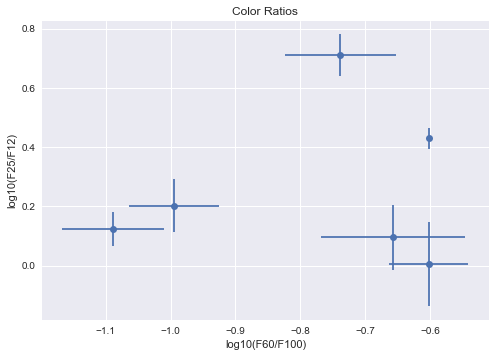

In [34]:
plt.figure()
plt.title('Color Ratios')
plt.ylabel('log10(F25/F12)')
plt.xlabel('log10(F60/F100)')

x = np.log10(data['Fnu_60'] / data['Fnu_100'])
y = np.log10(data['Fnu_25'] / data['Fnu_12'])
err = [data[flux] * 1e-2 * data['e_'+flux] for flux in ['Fnu_12', 'Fnu_25', 'Fnu_60', 'Fnu_100']]
# data['err_Fnu_12']
yerr = 1/np.log(10) * np.sqrt(1/data['Fnu_25']**2 * err[1]**2 + 1/data['Fnu_12']**2 * err[0]**2)
xerr = 1/np.log(10) * np.sqrt(1/data['Fnu_60']**2 * err[2]**2 + 1/data['Fnu_100']**2 * err[3]**2)


plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o')

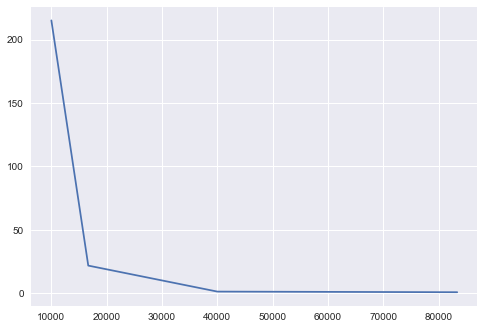

In [35]:
obj = data[data.IRAS == '02157+6053']
waves = np.array([12, 25, 60, 100])
freqs =  1 / (waves * 1e-6)
y = obj[['Fnu_12', 'Fnu_25', 'Fnu_60', 'Fnu_100']].values.flatten()

plt.plot(freqs, y)